## Simulación del Problema de Monty Hall


https://es.wikipedia.org/wiki/Problema_de_Monty_Hall




In [15]:
import random # Librerias usadas en el programa
import notebook
from numba import jit
from numpy import arange

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [17]:
import matplotlib.pyplot as plt # librería de gráficos

%matplotlib inline

def grafico_tarta(ganadas, perdidas):

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Ganadas', 'Perdidas'
    sizes = [ganadas, perdidas]
    explode = (0, 0.1)  # saca el sector un poco hacia fuera
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()


In [18]:
numero_puertas=10000 # valor por defecto
puerta_ganadora = random.randint(1,3)       
puerta_elegida = None
puerta_eliminada = None
cambio=True 

In [19]:
@jit
def juega_partida(HayCambio):

    puerta_elegida = random.randint(1,3)
    puerta_ganadora = random.randint(1,3)
    puerta_eliminada = None
    
    """
    El maestro de ceremonias elimina una puerta no premiada, al azar
    """
    d = random.randint(1,3)
    # Si es la elegida por el concursante o la del premio elegimos otra.
    while d == puerta_elegida or d == puerta_ganadora:
        d = random.randint(1,3)
    puerta_eliminada = d    
    
    if (HayCambio): #cambia la puerta usando los números
        puerta_elegida = (6 - puerta_elegida - puerta_eliminada)

    if (puerta_elegida == puerta_ganadora):
        return True
    else:
        return False
    return (puerta_elegida == puerta_ganadora)


In [20]:
#interact(Puertas,x=miSlider);

def boton_pulsado(b):
    NumeroPuertas=miSlider.value
    print("Versión Notebook:", notebook.__version__)
    print("Versión Widgets:", notebook.__version__)

    print ("Inicio de la Simulación")
    print("Para un numero de puertas de",NumeroPuertas)
    print ("Opcion: Mantenemos la elección original")  
    
    Etiqueta1=widgets.Label(
        value="Sin Cambio de Puerta",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    )
    display(Etiqueta1)
    display(barra_progreso_sin_cambio)
  
    ganadas, perdidas = 0, 0
    
    for i in range(NumeroPuertas):
        barra_progreso_sin_cambio.value = (100 * i / NumeroPuertas)

        if juega_partida(False):
            ganadas += 1
        else:
            perdidas += 1
            
    porcentaje_ganadas = 100.0 * ganadas / (ganadas+perdidas)
    print ("Resultados de la simulación:") 
    print ("Para un número de partidas (conservando la puerta original) de:",NumeroPuertas)
    print ("  ganadas:", ganadas, "partidas")
    print ("  perdidas:", perdidas, "partidas")
    print ("  Probabilidad de Ganar: %.2f%% porcentual" % porcentaje_ganadas)
    grafico_tarta(ganadas,perdidas)

    print ("Opcion: Cambio de Puerta")
    Etiqueta2=widgets.Label(
        value="Cambio de Puerta",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    )
    display(Etiqueta2)
    display(barra_progreso_con_cambio)
    cambio=True      
    ganadas, perdidas = 0, 0
    for i in range(NumeroPuertas):
        barra_progreso_con_cambio.value =  100 * i / NumeroPuertas
        if (juega_partida(True)):
            ganadas += 1
        else:
            perdidas += 1           
    porcentaje_ganadas = 100.0 * ganadas / (ganadas+perdidas)
    print ("Resultados de la simulación:") 
    print ("Para un número de partidas (cambiando de puerta) de:", NumeroPuertas)
    print ("  ganadas:", ganadas, "partidas")
    print ("  perdidas:", perdidas, "partidas")
    print ("  Probabilidad de Ganar: %.2f%% porcentual" % porcentaje_ganadas)
    grafico_tarta(ganadas,perdidas)
            
    print("Fin de la Simulación")    
    



Versión Notebook: 4.3.1
Versión Widgets: 4.3.1
Inicio de la Simulación
Para un numero de puertas de 70000
Opcion: Mantenemos la elección original
Resultados de la simulación:
Para un número de partidas (conservando la puerta original) de: 70000
  ganadas: 23434 partidas
  perdidas: 46566 partidas
  Probabilidad de Ganar: 33.48% porcentual


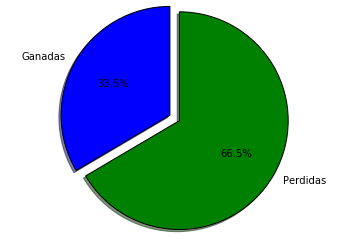

Opcion: Cambio de Puerta
Resultados de la simulación:
Para un número de partidas (cambiando de puerta) de: 70000
  ganadas: 46765 partidas
  perdidas: 23235 partidas
  Probabilidad de Ganar: 66.81% porcentual


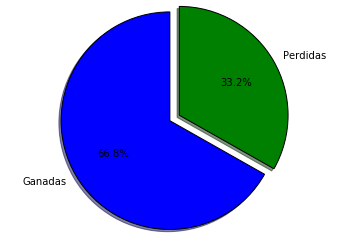

Fin de la Simulación


In [ ]:
# Inicio del programa
barra_progreso_sin_cambio = widgets.IntProgress(min=0, max=100, value=1)
barra_progreso_sin_cambio.bar_style = 'success'

barra_progreso_con_cambio = widgets.IntProgress(min=0, max=100, value=1)
barra_progreso_con_cambio.bar_style = 'success'

Etiqueta=widgets.Label(
    value="Simulación Monty. ¿número de Puertas:?",
    placeholder='Some LaTeX',
    description='Some LaTeX',
    disabled=False
)
display(Etiqueta)    
miSlider=widgets.IntSlider(min=1,max=1000000,step=1,value=70000)
display(miSlider)  
#interact(Puertas,x=miSlider);

#NumeroPuertas=miSlider.value
boton=widgets.Button(
    description='Ejecutar Simulación',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
boton.on_click(boton_pulsado)
display(boton)
